## Dataset Importing from Kaggle

In [7]:
# !pip install -q kaggle

In [1]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c bike-sharing-demand

In [ ]:
!unzip bike-sharing-demand.zip

## Feature description
https://www.kaggle.com/competitions/bike-sharing-demand/data

<pre>
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
</pre>

## Importing neccessary libraries

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#

## Mounting Drive and creating DataFrame

In [265]:
# from google.colab import drive
# drive.mount('/content/drive')

In [266]:
# train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML practice/bike_sharing_train.csv')
# test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML practice/bike_sharing_test.csv')

Or create Dataframe from Kaggle files

In [267]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [268]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [269]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Data Preprocessing

#### Here target variable is 'count'

### Handling null values

In [270]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [271]:
test_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

#### **Inference**
There are no null values

### Handling Duplicate values

In [272]:
train_df.duplicated().sum()

0

In [273]:
test_df.duplicated().sum()

0

### Handling dataypes and columns

Note - ['count'] feature is the y which is only presented in the train data

In [274]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [275]:
test_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

Datetime columns are need to be treated

In [276]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [277]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### Creating Year, Month, Day and Hour columns from datetime field

In [278]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [279]:
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


### Droping unrelavent features

In [280]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [281]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [282]:
train_df.drop(['datetime', 'casual', 'registered' ], axis = 1, inplace = True)
test_df.drop(['datetime'], axis = 1, inplace = True)

In [283]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [284]:
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


## EDA

In [285]:
train_df.describe().T # ignoring the outliers for now

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
year,10886.0,2011.501929,0.500019,2011.00,2011.0000,2012.000,2012.0000,2012.0000


In [286]:
train_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [287]:
train_df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [288]:
train_df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [289]:
train_df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [290]:
train_df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [291]:
train_df['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

In [292]:
train_df['month'].value_counts()

month
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: count, dtype: int64

In [293]:
train_df['day'].value_counts()

day
1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: count, dtype: int64

### Depicting month wise mean of count

In [294]:
r1 = train_df.groupby('month')['count'].mean()
r1

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

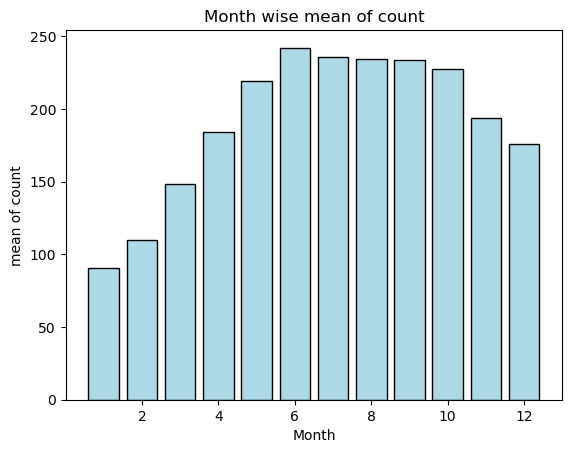

In [295]:
plt.bar(r1.index, r1, color = 'lightblue', edgecolor = 'black')
plt.title('Month wise mean of count')
plt.xlabel('Month')
plt.ylabel('mean of count')
plt.show()

### Depicting year wise mean of count

In [296]:
r2 = train_df.groupby('year')['count'].mean()
r2

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

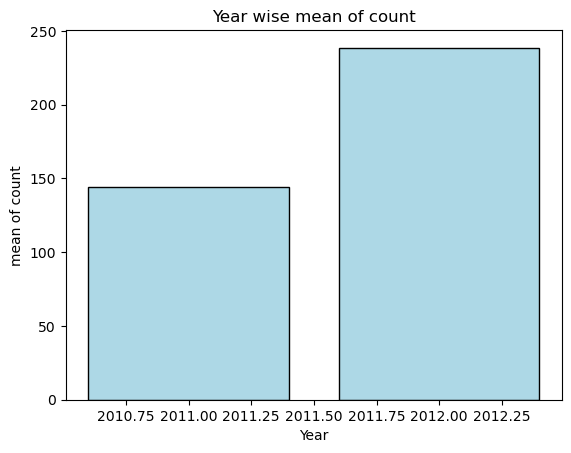

In [297]:
plt.bar(r2.index, r2, color = 'lightblue', edgecolor = 'black')
plt.title('Year wise mean of count')
plt.xlabel('Year')
plt.ylabel('mean of count')
plt.show()

### Histogram for count

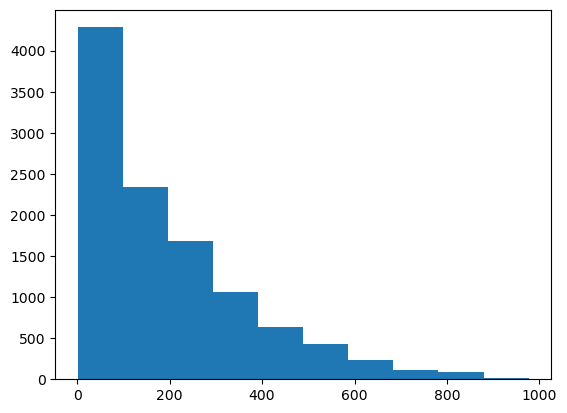

In [298]:
plt.hist(train_df['count'])
plt.show()

### Correlation

In [299]:
train_df.dtypes.to_list()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int32'),
 dtype('int32'),
 dtype('int32'),
 dtype('int32')]

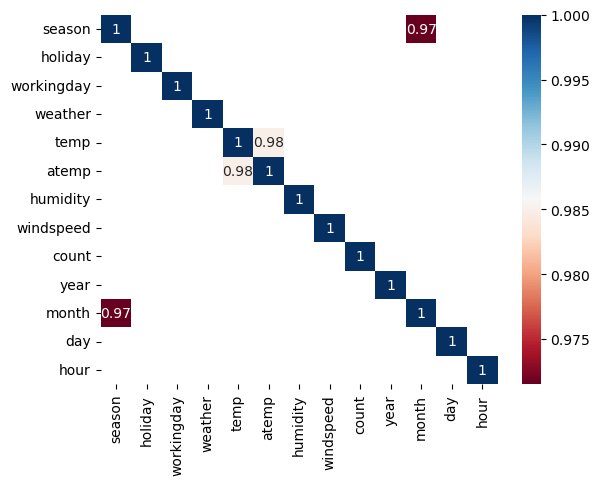

In [300]:
corr = train_df.corr()
corr = corr[abs(corr)>=0.7]
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### **Inference**
1) temp and atemp are highly correlated<br>
2) month and season are highly correlated

In [301]:
df1 = train_df.copy()
df2 = train_df.copy()
df3 = train_df.copy()

dfa = test_df.copy()
dfb = test_df.copy()
dfc = test_df.copy()

In [302]:
train_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [303]:
train_df.drop(['atemp', 'season'], axis = 1, inplace = True)
train_df.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [304]:
test_df.drop(['atemp', 'season'], axis = 1, inplace = True)
test_df.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [305]:
train_df.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [306]:
test_df.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour'],
      dtype='object')

## Model implimententation

### Select x and y

In [307]:
x = train_df.drop(['count'], axis = 1)
y = train_df['count']

print(x.shape)
print(y.shape)

(10886, 10)
(10886,)


### Split Data into train and test data

In [308]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 10)
(2178, 10)
(8708,)
(2178,)


### Evaluation Regression metrics, model scores and model coefficients and intercepts

In [309]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [310]:

def eval_model(model, ypred, mname):
  mae = mean_absolute_error(y_test, ypred)
  mse = mean_squared_error(y_test, ypred)
  rmse = np.sqrt(mse)
  train_r2 = model.score(x_train, y_train)
  test_r2 = model.score(x_test, y_test)

  res_df = pd.DataFrame({'TEST_MAE':mae, 'TEST_MSE':mse, 'TEST_RMSE':rmse, 'Train_R2':train_r2, 'Test_R2':test_r2}, index=[mname])
  return res_df

def reg_coef_inter(model):
  print('Model coefficients', model.coef_)
  print('Model intercepts', model.intercept_)

### Importing the ML Regression Libraries

In [311]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

### Linear Regression

In [312]:
lb = LinearRegression()
lb.fit(x_train, y_train)


LinearRegression()

In [313]:
ypred_lb = lb.predict(x_test)

In [314]:
res_lb = eval_model(lb, ypred_lb, 'LinearRegression')
res_lb

,TEST_MAE,TEST_MSE,TEST_RMSE,Train_R2,Test_R2
LinearRegression,105.38914,19964.842486,141.297001,0.385892,0.395132


In [315]:
reg_coef_inter(lb)

Model coefficients [-12.06654403   0.23311336  -5.59426865   6.508382    -2.00738343
   0.35879906  82.55369586   7.64606064   0.21617355   7.89506792]
Model intercepts -166012.83517481876


#### KNN Regression

In [316]:
knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [317]:
ypred_knn = knn.predict(x_test)

In [318]:
res_knn = eval_model(knn, ypred_knn, 'KNN')
res_knn

,TEST_MAE,TEST_MSE,TEST_RMSE,Train_R2,Test_R2
KNN,88.061861,15633.235023,125.032936,0.580075,0.526365


#### Ridge Regression

In [319]:
rb = Ridge(alpha = 10)
rb.fit(x_train, y_train)

Ridge(alpha=10)

In [320]:
ypred_rb = rb.predict(x_test)

In [321]:
res_rb = eval_model(rb, ypred_rb, 'Ridge')
res_rb

,TEST_MAE,TEST_MSE,TEST_RMSE,Train_R2,Test_R2
Ridge,105.368153,19964.583404,141.296084,0.38589,0.39514


In [322]:
reg_coef_inter(rb)

Model coefficients [-11.55425775   0.27559495  -5.56221739   6.50990159  -2.00881161
   0.357307    82.16905272   7.64515427   0.21666341   7.89366759]
Model intercepts -165239.1203795031


#### Lasso Regression

In [323]:
las = Lasso(alpha = 0.1)
las.fit(x_train, y_train)


Lasso(alpha=0.1)

In [324]:
ypred_las = las.predict(x_test)

In [325]:
res_las = eval_model(las, ypred_las, 'Lasso')
res_las

,TEST_MAE,TEST_MSE,TEST_RMSE,Train_R2,Test_R2
Lasso,105.322221,19961.659589,141.285737,0.385878,0.395228


In [326]:
test_pred_count = knn.predict(test_df)

In [327]:
test_pred_count.shape

(6493,)

### Results obtained through model score

In [328]:
all_res = pd.concat([res_lb, res_knn, res_rb, res_las]).sort_values(by = 'Test_R2', ascending = False)
all_res

,TEST_MAE,TEST_MSE,TEST_RMSE,Train_R2,Test_R2
KNN,88.061861,15633.235023,125.032936,0.580075,0.526365
Lasso,105.322221,19961.659589,141.285737,0.385878,0.395228
Ridge,105.368153,19964.583404,141.296084,0.385890,0.395140
LinearRegression,105.389140,19964.842486,141.297001,0.385892,0.395132


### Applying Hyperparameter Tuning, k-Fold and cross validation

**Optimal value of K for KNN with accuray score**

In [329]:
def optimal_k():
  k = list(range(3,40,2))
  accuracy = []
  for i in range(len(k)):
    knn_model = KNeighborsRegressor(n_neighbors = k[i])
    knn_model.fit(x_train, y_train)
    accuracy.append(knn_model.score(x_test, y_test))

  print('Accuracy \n', accuracy)

  k_best = k[np.argmax(accuracy)]
  print('Best value of K is', k_best)
  print('Best accuracy of K is', accuracy[np.argmax(accuracy)])

  plt.plot(k, accuracy, color = 'maroon', marker = 'o')
  plt.xlabel('Num of nearest negihbors')
  plt.ylabel('Test accuracy')
  plt.grid()
  plt.show()

Accuracy 
 [0.5329531142653752, 0.5361452727715572, 0.5404088188079588, 0.5338794023791884, 0.5333450046840877, 0.5330944936334676, 0.5263651528611977, 0.5212329480364759, 0.5198296352320094, 0.5169101540808863, 0.5147350590815654, 0.5111777892343581, 0.5097164060982717, 0.5086238622202315, 0.5061900220592406, 0.5048816633686216, 0.5044572897032761, 0.5023910910006851, 0.5012750180732335]
Best value of K is 7
Best accuracy of K is 0.5404088188079588


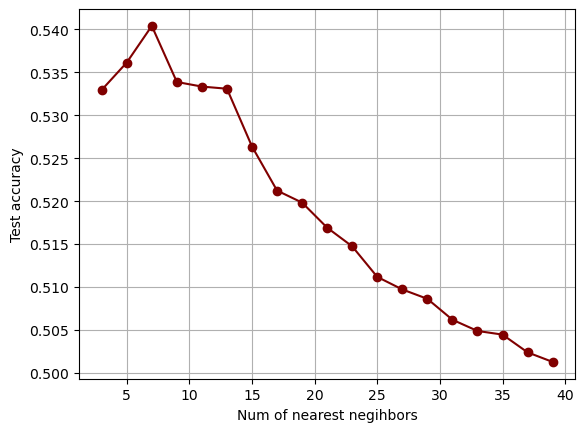

In [330]:
optimal_k()

**Cross Validation optimal value of k without k-fold**

In [331]:
from sklearn.model_selection import KFold, cross_val_score

In [332]:
# k_range = range(1, 31)
# k_scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
#     k_scores.append(scores.mean())

In [333]:
def optimal_k_cv():
  k_range = list(range(3,40,2))
  k_scores = []

  for i in k_range:
    knn = KNeighborsRegressor(n_neighbors = i)
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'r2')
    k_scores.append(scores.mean())

  k_best = k_range[np.argmax(k_scores)]
  print('Best value of K is', k_best)
  print('Best accuracy of K is', k_scores[np.argmax(k_scores)])

  plt.plot(k_range, k_scores, color = 'maroon', marker = 'o')
  plt.xlabel('Num of nearest negihbors')
  plt.ylabel('Test accuracy')
  plt.grid()
  plt.show()

Best value of K is 5
Best accuracy of K is 0.5147978246867153


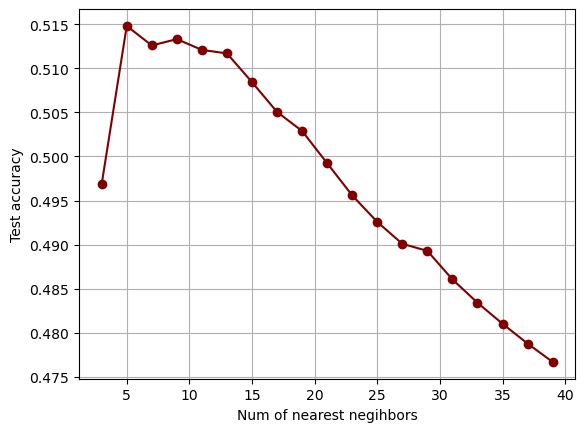

In [334]:
optimal_k_cv()

**Cross Validation optimal value of k with k-fold**

In [335]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [336]:
def optimal_cvkf():
  k_range = list(range(3,40,2))
  k_scores = []

  for i in k_range:
    knn = KNeighborsRegressor(n_neighbors = i)
    scores = cross_val_score(knn, x_train, y_train, cv = kf, scoring = 'r2')
    k_scores.append(scores.mean())

  k_best = k_range[np.argmax(k_scores)]
  print('Best value of K is', k_best)
  print('Best accuracy of K is', k_scores[np.argmax(k_scores)])

  plt.plot(k_range, k_scores, color = 'maroon', marker = 'o')
  plt.xlabel('Num of nearest negihbors')
  plt.ylabel('Test accuracy')
  plt.grid()
  plt.show()

Best value of K is 9
Best accuracy of K is 0.5063173828549818


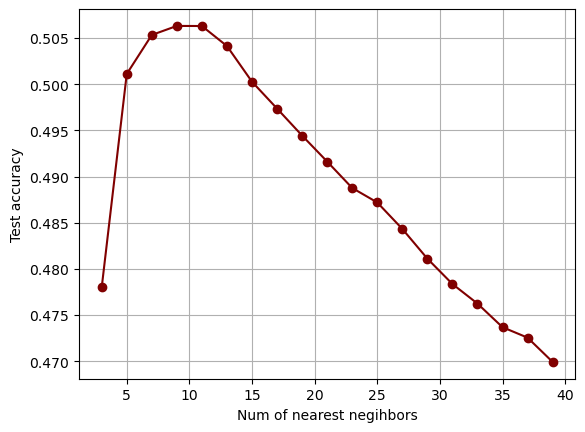

In [337]:
optimal_cvkf()

### **Inference**

KNN seems to be best fit model for the case and k is 7


### Hyperparameter Tuning for best model evaluation

In [338]:
from sklearn.model_selection import GridSearchCV

In [339]:
all_res

,TEST_MAE,TEST_MSE,TEST_RMSE,Train_R2,Test_R2
KNN,88.061861,15633.235023,125.032936,0.580075,0.526365
Lasso,105.322221,19961.659589,141.285737,0.385878,0.395228
Ridge,105.368153,19964.583404,141.296084,0.385890,0.395140
LinearRegression,105.389140,19964.842486,141.297001,0.385892,0.395132


In [340]:
knn = KNeighborsRegressor()
las = Lasso()
rb = Ridge()
lb = LinearRegression()

In [341]:
model_params = {
    'knn': {
        'model': KNeighborsRegressor(),
        'params' : {
            'n_neighbors': [3,5,7,9,11,13,15]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params' : {
            'alpha': [1,2,3,4,5,6,7,8,9,10]
        }
    },
    'Ridge' : {
        'model': Ridge(),
        'params': {
            'alpha': [1,2,3,4,5,6,7,8,9,10]
        },

    },
    'LinearRegression' : {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    }
}


In [342]:
scores = []

for model_name, mp in model_params.items():
    grd =  GridSearchCV(mp['model'], mp['params'], cv=kf, return_train_score=False)
    grd.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': grd.best_score_,
        'best_params': grd.best_params_
    })

In [343]:
sc = pd.DataFrame(scores,columns=['best_score','best_params'],  index = model_params.keys()).sort_values(by = 'best_score', ascending = False)
sc

,best_score,best_params
knn,0.506317,{'n_neighbors': 9}
Ridge,0.383724,{'alpha': 10}
LinearRegression,0.383721,{'fit_intercept': True}
Lasso,0.383649,{'alpha': 1}


In [344]:
grd.best_score_

0.38372133341066367

In [345]:
grd.best_params_

{'fit_intercept': True}

## Predicting Results

In [346]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [347]:
y_pred = knn.predict(test_df)

In [348]:
test_df['count_prediction'] = y_pred
test_df.head()

,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,count_prediction
0,0,1,1,10.66,56,26.0027,2011,1,20,0,78.428571
1,0,1,1,10.66,56,0.0000,2011,1,20,1,17.142857
2,0,1,1,10.66,56,0.0000,2011,1,20,2,17.714286
3,0,1,1,10.66,56,11.0014,2011,1,20,3,12.142857
4,0,1,1,10.66,56,11.0014,2011,1,20,4,27.714286


In [349]:
# test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ML practice/bike_sharing_test_prediction_submission.csv', index = False)

In [350]:
test_df.to_csv('bike_sharing_test_prediction.csv', index = False)